# CNN chalenge

In this exercise, you will build a CNN to classify images from the Fashion MNIST dataset, train the model, evaluate its performance, and visualize predictions with a confusion matrix.

## Prepare the data

Load the Fashion MNIST dataset using Keras and display the first few images with their labels to get a sense of the data.

In [6]:
from tensorflow.keras.datasets import fashion_mnist
import matplotlib.pyplot as plt

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

# Task: Normalize the data to have pixel values between 0 and 1
X_train = x_train / 255.0
X_test = x_test / 255.0

Visualize 5 random images from the training set with their labels.

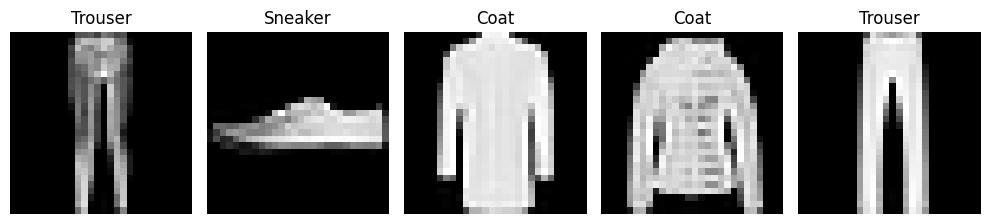

In [7]:
# Your code here for visualization
import numpy as np
# Define the class labels for Fashion MNIST
class_labels = [
    'T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
    'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot'
]

# Set up the plot
plt.figure(figsize=(10, 5))

# Select 5 random indices
random_indices = np.random.choice(x_train.shape[0], 5, replace=False)

# Loop through the 5 random indices
for i, idx in enumerate(random_indices):
    plt.subplot(1, 5, i + 1)
    plt.imshow(x_train[idx], cmap='gray')  # Display the image in grayscale
    plt.title(class_labels[y_train[idx]])  # Get the label name
    plt.axis('off')  # Remove axes for better visualization

# Display the images
plt.tight_layout()
plt.show()


Reshape the data to include a channel dimension and confirm the new shape.

In [8]:
# Task: Reshape x_train and x_test to include the channel dimension
# Your code here
X_train = np.expand_dims(X_train, axis=-1)
X_test = np.expand_dims(X_test, axis=-1)

## Build the CNN model

Create a CNN with at least two convolutional layers, followed by max pooling layers, and a dense output layer.

Rememeber the `Conv2D`, `MaxPooling2D`, `Flatten`, `Dropout` and `Dense`layers.

In [9]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Task: Build your model here
model = Sequential()
    # Your layers here
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Compile your model with an appropriate optimizer, loss function, and metric.

In [10]:
# Task: Compile your model
# Your code here
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

Train your model using model.fit(), setting a validation split of 20% and training for at least 10 epochs.

In [11]:
# Task: Train the model and store the training history in a variable
# Your code here
model_history = model.fit(X_train, y_train, epochs=10, validation_split=0.2)

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 55s 36ms/step - accuracy: 0.7118 - loss: 0.7964 - val_accuracy: 0.8600 - val_loss: 0.3764
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 53s 36ms/step - accuracy: 0.8532 - loss: 0.4152 - val_accuracy: 0.8800 - val_loss: 0.3191
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 51s 34ms/step - accuracy: 0.8732 - loss: 0.3524 - val_accuracy: 0.8892 - val_loss: 0.2961
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 83s 35ms/step - accuracy: 0.8849 - loss: 0.3183 - val_accuracy: 0.8971 - val_loss: 0.2732
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 82s 35ms/step - accuracy: 0.8948 - loss: 0.2873 - val_accuracy: 0.9029 - val_loss: 0.2645
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 82s 35ms/step - accuracy: 0.9025 - loss: 0.2678 - val_accuracy: 0.9047 - val_loss: 0.2619
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 52s 34ms/step - accuracy: 0.9098 - loss: 0.2432 - val_accuracy: 0.9097 - val_loss: 0.2459
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 82s 35ms/step - accuracy: 0.9151 -

## Evaluate the model

Evaluate your model on the test set and print the test accuracy.

In [12]:
# Task: Evaluate the model on the test data
# Your code here
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test accuracy: {test_accuracy}")


313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.9066 - loss: 0.2683
Test accuracy: 0.9064000248908997


Use your model to predict the labels for the test set. Display 5 test images with their predicted and true labels.

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step


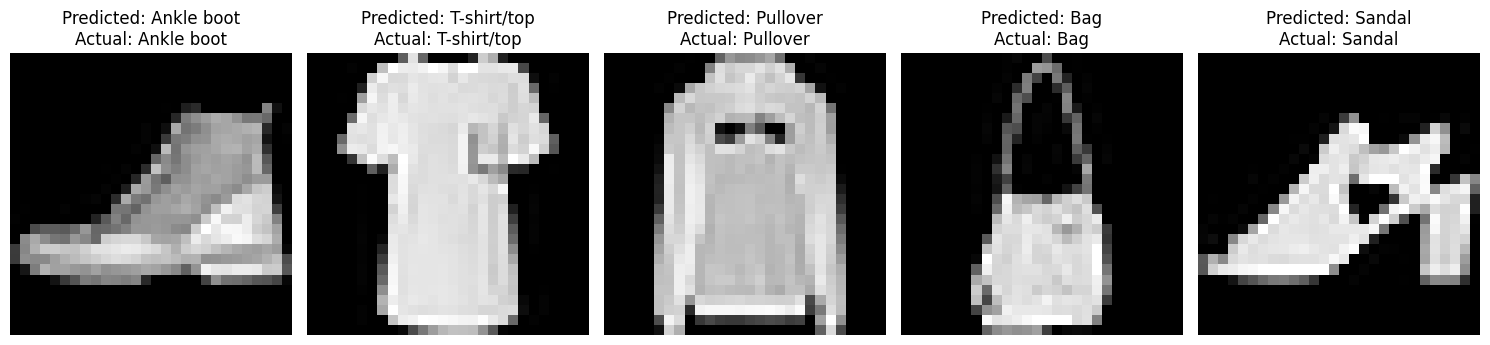

In [13]:
# Task: Use model.predict() and display predictions
import numpy as np
import matplotlib.pyplot as plt

predictions = model.predict(X_test)
predicted_labels = np.argmax(predictions, axis=1)


# Your code here to display images with predicted and actual labels
num_images = 5
random_indices = np.random.choice(X_test.shape[0], num_images, replace=False)

plt.figure(figsize=(15, 5))
for i, idx in enumerate(random_indices):
    plt.subplot(1, num_images, i + 1)
    plt.imshow(X_test[idx].reshape(28, 28), cmap='gray')
    plt.title(
        f"Predicted: {class_labels[predicted_labels[idx]]}\n"
        f"Actual: {class_labels[y_test[idx]]}"
    )
    plt.axis('off')

plt.tight_layout()
plt.show()

Construct a confusion matrix to visualize how well your model performed across different classes.

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step


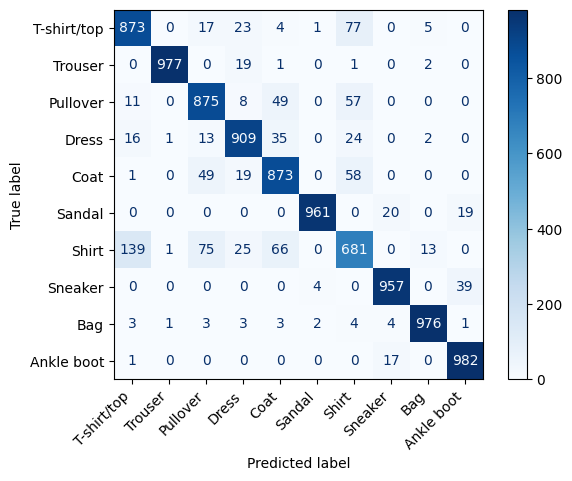

In [15]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import numpy as np

# Task: Create predictions and a confusion matrix
# Your code here
y_pred = np.argmax(model.predict(X_test), axis=1)
cm = confusion_matrix(y_test, y_pred)
# Your code here

# Display the confusion matrix
# Your code here
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_labels)
disp.plot(cmap=plt.cm.Blues, values_format='d')
plt.xticks(rotation=45, ha='right')
plt.show()
